# Workplace Safety Incident Prediction
**This project analyzes unsafe acts, incidents, and worker-related safety issues to predict total incidents and injuries in the workplace.**

**Dataset Features:**

<pre>
1. Fall_UA: Unsafe Acts and Conditions that can cause Falling
2. Trip_UA: Unsafe Acts and Conditions that can cause Tripping
3. Bump_UA: Unsafe Acts and Conditions that can cause Bumping
4. Hit_UA: Unsafe Acts and Conditions that can cause Hitting
5. Stuck_UA: Unsafe Acts and Conditions that can cause Entrapment
6. Cut_UA: Unsafe Acts and Conditions that can cause Cutting
7. Muscle_UA: Unsafe Acts and Conditions that can cause Muscle Disorders
8. Fall_II: Falling Incidents and Injuries
9. Trip_II: Tripping Incidents and Injuries
10. Bump_II: Bumping Incidents and Injuries
11. Hit_II: Hitting Incidents and Injuries
12. Stuck_II: Entrapment Incidents and Injuries
13. Cut_II: Cutting Incidents and Injuries
14. Muscle_II: Muscle Injuries and Disorders
15. Workers: Number of Workers daily
16. Total_Unsafe_Acts: Unsafe Acts and Conditions committed by Workers daily                      
17. Incidents_Injuries: Incidents and injuries occured to Workers daily
                        (then divided by 100 for fitting)                      
</pre>

## 1. Correlation Analysis

#### First, I needed to analyze the correlation between variables and visualize them using a scatterplot matrix to better understand the relationships between these features.

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

Load Data 

Reads data from an Excel file and previews it.

In [2]:
df = pd.read_excel('C:/Users/82109/Desktop/Portfolio/Unsafe_Injuries/Unsafe_Injuries.xlsx')
df.head()

,Date,Fall_UA,Trip_UA,Bump_UA,Hit_UA,Stuck_UA,Cut_UA,Muscle_UA,Fall_II,Trip_II,Bump_II,Hit_II,Stuck_II,Cut_II,Muscle_II,Workers,Total_Unsafe_Acts,Total_Incidents_Injuries
0,2023.08.01,4,0,3,4,0,0,4,0,0,1,0,1,0,0,300,15,0.02
1,2023.08.02,3,2,3,2,3,4,1,0,0,0,1,0,1,0,342,18,0.02
2,2023.08.03,0,2,3,2,3,1,1,0,1,0,0,1,0,0,332,12,0.04
3,2023.08.04,3,4,3,1,2,1,2,0,0,0,0,0,0,0,311,16,0.00
4,2023.08.05,1,2,0,3,2,1,4,2,0,0,0,0,0,1,333,13,0.03


Correlation Analysis

Compute and analyze the correlation between variables to understand their relationships.

In [3]:
corr_matrix = df.corr()

In [4]:
corr_matrix["Total_Incidents_Injuries"].sort_values(ascending=False)

Total_Incidents_Injuries    1.000000
Total_Unsafe_Acts           0.776173
Stuck_II                    0.735471
Hit_II                      0.727851
Trip_II                     0.727181
Cut_II                      0.713522
Workers                     0.709314
Bump_II                     0.673763
Fall_II                     0.668425
Muscle_II                   0.650744
Cut_UA                      0.522371
Muscle_UA                   0.503417
Stuck_UA                    0.482093
Fall_UA                     0.465446
Hit_UA                      0.445419
Bump_UA                     0.444674
Trip_UA                     0.440084
Name: Total_Incidents_Injuries, dtype: float64

Plotting

Visualize relationships between selected variables using a scatter matrix to identify patterns and correlations.

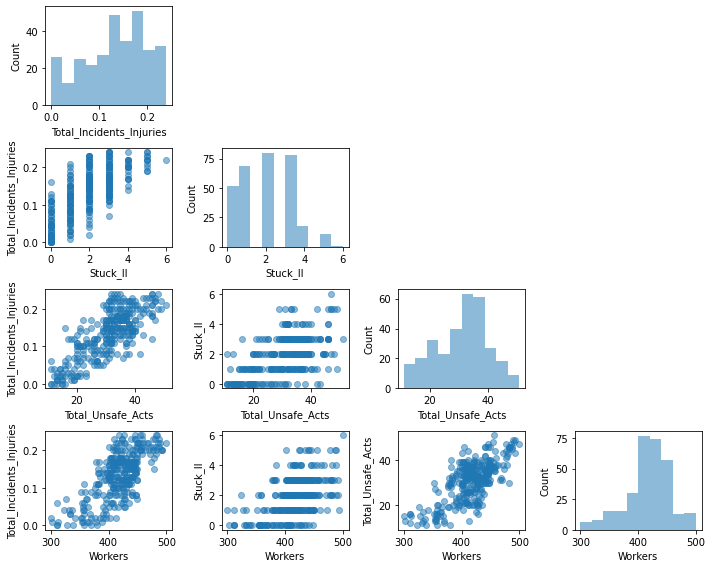

In [5]:
# Create a scatterplot matrix for selected columns
cols = ['Total_Incidents_Injuries', 'Stuck_II', 'Total_Unsafe_Acts', 'Workers']

scatterplotmatrix(df[cols].values, figsize=(10, 8),
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

#### Result: It appears that there is a strong linear relationship between Workers, Total_Unsafe_Acts, and Total_Incidents_Injuries.

## 2. Feature Importance

#### Then I identified and ranked the relative significance of each input feature in predicting the target variable in order to improve model performance.

Prepare Data

Splits the data into training and test sets. 30% of data is used for testing.

In [6]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:-1].values, df['Total_Incidents_Injuries'].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)

Train Model

Train a RandomForestRegressor model using 500 trees to predict the target variable (Total_Incidents_Injuries).

In [7]:
from sklearn.ensemble import RandomForestRegressor

feat_labels = df.columns[1:]

forest = RandomForestRegressor(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=1)

Evaluate Feature Importance

Gets the importance of each feature and sort them by descending order. 

In [8]:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) Total_Unsafe_Acts              0.503063
 2) Stuck_II                       0.116147
 3) Workers                        0.111602
 4) Trip_II                        0.071065
 5) Bump_II                        0.045004
 6) Hit_II                         0.032533
 7) Muscle_II                      0.029982
 8) Fall_II                        0.027848
 9) Cut_II                         0.022711
10) Muscle_UA                      0.009708
11) Stuck_UA                       0.006168
12) Hit_UA                         0.005322
13) Trip_UA                        0.005088
14) Cut_UA                         0.004778
15) Bump_UA                        0.004755
16) Fall_UA                        0.004223


Plot Feature Importance

Creates a bar chart of feature importances to display the plot.

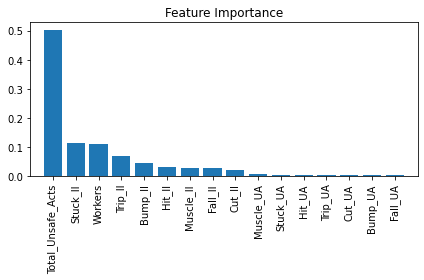

In [9]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## 3. Heat Map

I created a correlation matrix to quantify and summarize the linear relationships between variables, making it easier to handle the features.

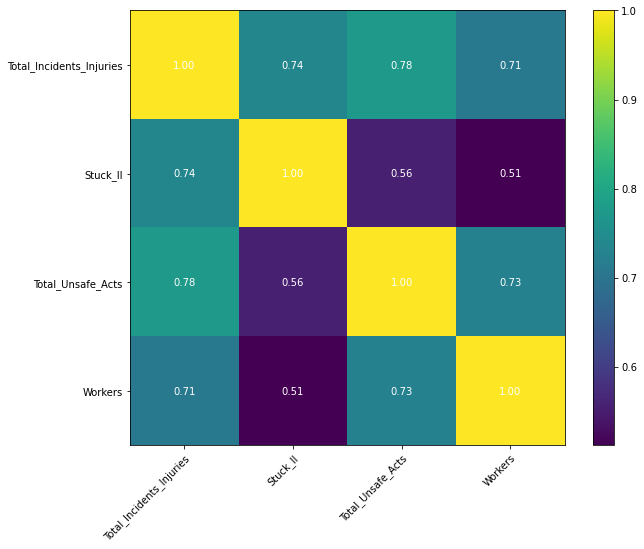

In [10]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols, figsize=(10, 8))

plt.show()

## 4. Different Regression Models
#### Next, by utilizing different regression models, I was able to understand and predict how worker numbers correlate with unsafe acts. Also, see which one better captures the underlying relationships in the data.

### 4-1. Adaline (Adaptive Linear Neuron) using gradient descent

The purpose of this code is to create a simple model that can predict outcomes based on input data. The method 'Adaline' adjusts weights (or importance) of different inputs to minimize errors in predictions, helping the model learn and improve over time. 

In [11]:
class LinearRegressionGD(object):

    # set learning rate (eta) and number of iterations
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    # # Fit the model using gradient descent
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    # Compute the net input 
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Predict the target values for new data
    def predict(self, X):
        return self.net_input(X)

Train the model using the 'Workers' variable to predict 'Total_Unsafe_Acts.' Also, standardize the features to help the gradient descent algorithm converge effectively.

In [12]:
X = df[['Workers']].values
y = df['Total_Unsafe_Acts'].values

In [13]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten() 

In [14]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

When using gradient descent, it's helpful to plot the cost function over epochs to see if the algorithm is finding the minimum. In this case, it converges by the tenth epoch.

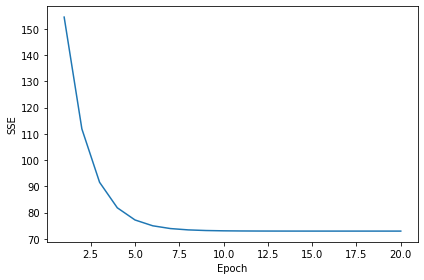

In [15]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()

plt.show()

Visualize how well this linear regression model fits the training data. I created a helper function that plots the scatter plot of the training samples and the regression line.

In [16]:
# Plot data points and linear regression line
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

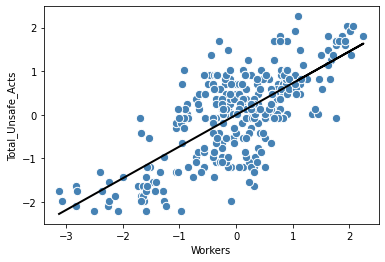

In [17]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Workers')
plt.ylabel('Total_Unsafe_Acts')

plt.show()

In [18]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.726
Intercept: -0.000


Result: A slope of 0.726 means that for every 1-unit increase in Workers, Total_Unsafe_Acts increases by approximately 0.726 on average.

### 4-2. Estimating the weights of a regression model using scikit-learn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Coefficient: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Coefficient: 0.175
Intercept: -42.220


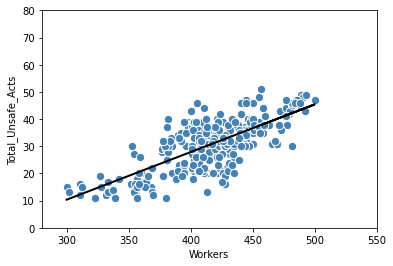

In [21]:
lin_regplot(X, y, slr)
plt.xlabel('Workers')
plt.ylabel('Total_Unsafe_Acts')
plt.xlim(280, 550)
plt.ylim(0, 80)

plt.show()

### 4-3. Regression model using RANSAC

#### The RANSAC (Random Sample Consensus) model is a strong algorithm to accurately fit a model even when the data has many outliers. It helps ensure that the model isn't thrown off by these outliers.

Use the linear model along with the RANSAC algorithm implemented in the RANSACRegressor class.

In [22]:
# Fit a RANSAC regression model with linear regression as the base estimator
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_error',
                         residual_threshold=5.0,
                         random_state=0)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=0,
                residual_threshold=5.0)

After training the RANSAC model, I obtained inliers and outliers from the trained RANSAC-linear regression model and plotted them along with the linear model.

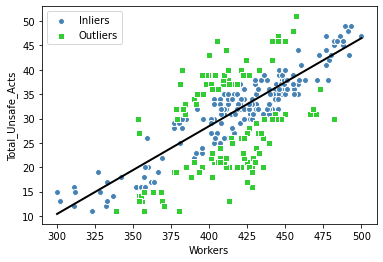

In [23]:
# Plot inliers, outliers, and the RANSAC regression line for the given data
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(300, 600, 100)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Workers')
plt.ylabel('Total_Unsafe_Acts')
plt.legend(loc='upper left')

plt.show()

In [24]:
print('Coefficient: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Coefficient: 0.180
Intercept: -43.698


## 5. Evaluation
#### Finally, I evaluated the model using MSE and  R² to determine how well the model fits the data and how accurately it can predict the target variable.

### 5-1. Linear Regression

X: Workers and Total_Unsafe_Acts

In [25]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 15:-1].values
y = df['Total_Incidents_Injuries'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [26]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Since there are more than one feature, it is not possible to plot the linear regression line on a 2D graph. Instead, I plotted residuals and predicted values to visualize.

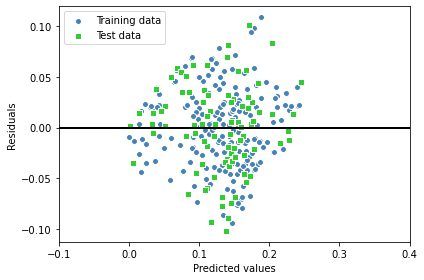

In [27]:
# Scatter plot of training and test data residuals
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')

# Add horizontal line at y=0 and set x-axis limits
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-0.1, 0.4])

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Train MSE: %.3f, Test MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('Train R²: %.3f, Test R²: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Train MSE: 0.001, Test MSE: 0.002
Train R²: 0.665, Test R²: 0.609


As shown in scatterplot matrix, the relationship between 'Workers' and 'Total_Incidents_Injuries' is not perfectly linear. Therefore, I tried using a Decision Tree Regressor and a Random Forest Regressor to improve the evaluations.

### 5-2. Decision Tree Regressor

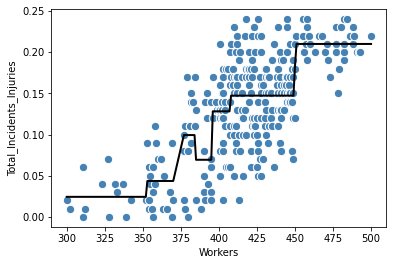

In [29]:
from sklearn.tree import DecisionTreeRegressor

X = df[['Workers']].values
y = df['Total_Incidents_Injuries'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Workers')
plt.ylabel('Total_Incidents_Injuries')

plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('Train MSE: %.3f, Test MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('Train R²: %.3f, Test R²: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Train MSE: 0.002, Test MSE: 0.002
Train R²: 0.585, Test R²: 0.537


Result: The Decision Tree Regressor is not well-fitted to the data, explaining only 54% of the variance in the test set.

### 5-3. Random Forest Regressor

#### Using GridSearchCV for a Random Forest Regressor in order to optimize the hyperparameter.

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

Features: Workers and Total_Unsafe_Acts

Target Variable: Total_Incidents_Injuries

In [32]:
X = df.iloc[:, 15:-1].values  
y = df['Total_Incidents_Injuries'].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

This code sets up a grid search to find the best hyperparameters for a RandomForestRegressor by testing various combinations. These combinations are tested to find the one that optimizes the highest R² score. After finding the best model, the R² and MSE are calculated.

In [33]:
# Define hyperparameter grid and set up GridSearchCV for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,  
                           n_jobs=-1,  
                           verbose=2,
                           scoring='r2') 

grid_search.fit(X_train, y_train)

# Get the best model and make predictions
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


Evaluations and Best Parameters of the Model

In [34]:
print('Train MSE: %.3f, Test MSE: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

print('Train R²: %.3f, Test R²: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

print("Best Parameters found by GridSearch:", grid_search.best_params_)

Train MSE: 0.001, Test MSE: 0.001
Train R²: 0.795, Test R²: 0.704
Best Parameters found by GridSearch: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 700}


Result: The R² score of the Random Forest Regressor is 70%, showing a 16% increase compared to the Linear Regression Model and 30% increase compared to the Decision Tree Regressor.